In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import dataset
df = pd.read_csv(r"C:\Users\tobun\OneDrive\Documents\Uncleaned_DS_jobs.csv")
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
#Drop the first column
df.drop('index', axis=1, inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.describe()

,Rating,Founded
count,672.000000,672.000000
mean,3.518601,1635.529762
std,1.410329,756.746640
min,-1.000000,-1.000000
25%,3.300000,1917.750000
50%,3.800000,1995.000000
75%,4.300000,2009.000000
max,5.000000,2019.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 73.6+ KB


In [6]:
#remove Glassdoor est from the salary estimate column
df['Salary Estimate'] = df['Salary Estimate'].str.replace('Glassdoor est.', '', regex=True)

#remove K from the salary estimate column
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '', regex=True)

#remove unwanted parentheses
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\(|\)', '', regex=True)

#remove $ from the salary estimate column
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '', regex=True)
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
#Remove float and \n from the company name column

df['Company Name'] = df['Company Name'].str.replace(r'\d\.\d','', regex=True)
df['Company Name'] = df['Company Name'].str.replace('\n','', regex=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [8]:
#Create Pandas Profile Report

#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
dfReport = pp.ProfileReport(df)
dfReport.to_file('dfReport3a-lbfgs.html')
#display(IFrame('RaisinReport3a-lbfgs.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import spacy
!pip install spacy
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 13.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [11]:
#Extract the skills from Job description
skills = ["python", "machine learning", "r", "sql", "aws", "excel", "power Bi", "hadoop", "spark", "big data"]

def extract_and_categorize_skills(text):
    doc = nlp(text.lower())  
    skill_dict = {skill: 1 if skill in doc.text else 0 for skill in skills}
    return skill_dict


df[skills] = df["Job Description"].apply(extract_and_categorize_skills).apply(pd.Series)

df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python,machine learning,r,sql,aws,excel,power Bi,hadoop,spark,big data
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,1,1,0,1,0,0,0,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,1,1,1,0,0,0,1,0,1
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,1,1,1,0,1,1,0,0,0,0
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,1,1,1,1,1,0,0,0,0
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,1,1,0,1,0,0,0,0


In [12]:
#Replace -1 in the sector column to unknown
df['Sector'] = df['Sector'].str.replace('-1','Unknown', regex=True)

In [13]:
#split salary estimate column into 2 coloumn
def split_salary_estimate(salary_estimate):
    if pd.notna(salary_estimate):
        salary_estimate = salary_estimate.replace('$', '').replace(',', '') 
        parts = salary_estimate.split('-')
        
        try:
            if len(parts) == 2:
                lower_salary = int(parts[0])
                upper_salary = int(parts[1])
                return lower_salary, upper_salary
        except ValueError:
            pass
    
    return pd.NA, pd.NA  

df[['Lower Salary', 'Upper Salary']] = df['Salary Estimate'].apply(lambda x: pd.Series(split_salary_estimate(x)))
df.head()



,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,r,sql,aws,excel,power Bi,hadoop,spark,big data,Lower Salary,Upper Salary
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,1,0,1,0,0,0,0,0,137,171
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,1,1,0,0,0,1,0,1,137,171
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,1,0,1,1,0,0,0,0,137,171
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,1,1,1,0,0,0,0,137,171
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,0,1,0,0,0,0,137,171


In [14]:
# Create a separate column for average salary
df['Average_Salary'] = (df['Lower Salary'] + df['Upper Salary']) / 2
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,sql,aws,excel,power Bi,hadoop,spark,big data,Lower Salary,Upper Salary,Average_Salary
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,1,0,0,0,0,0,137,171,154.0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,1,0,0,0,1,0,1,137,171,154.0
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,0,1,1,0,0,0,0,137,171,154.0
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,1,1,0,0,0,0,137,171,154.0
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,1,0,0,0,0,137,171,154.0


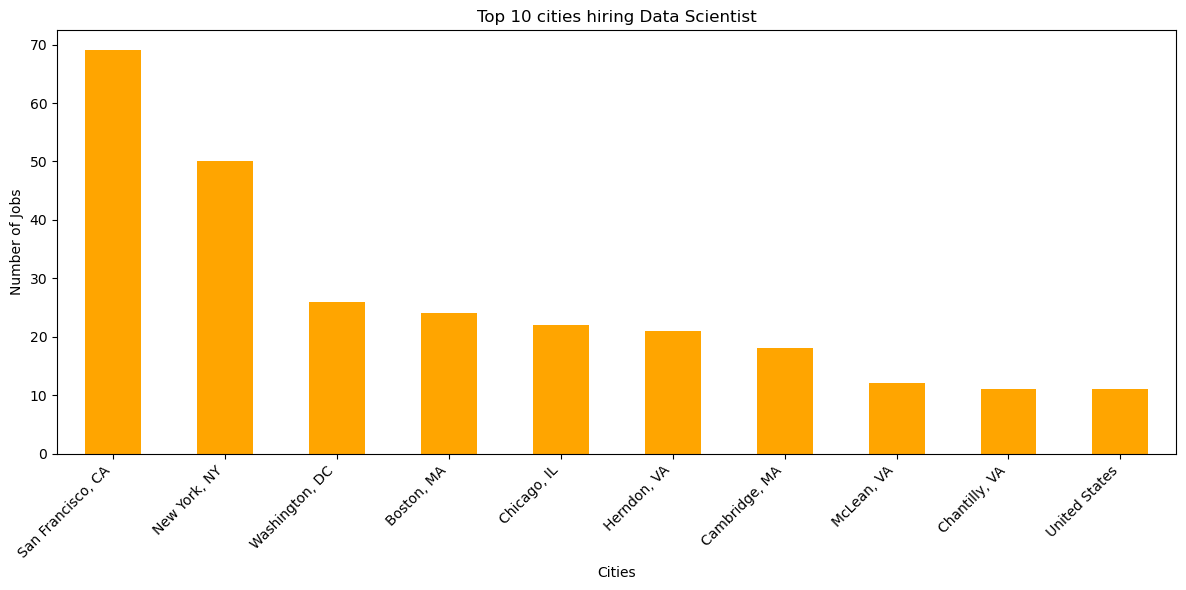

In [15]:
#Plot a bar chart showing the top 10 cities with the highest number of data science jobs.
location_counts = df['Location'].value_counts().head(10)  

plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='orange')
plt.title('Top 10 cities hiring Data Scientist')
plt.xlabel('Cities')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

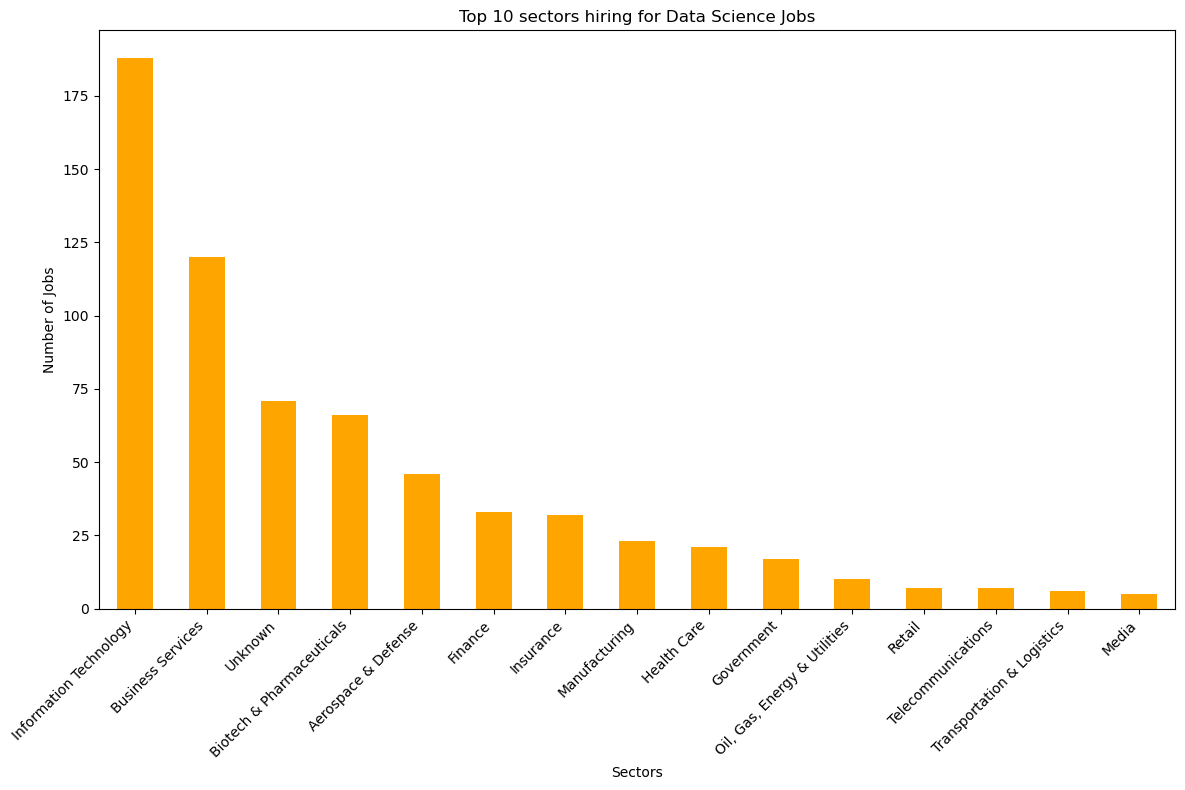

In [16]:
#Plot a bar chart showing the top 10 sectors with the highest number of data science jobs.
sector_counts = df['Sector'].value_counts().head(15)  

plt.figure(figsize=(12, 8))
sector_counts.plot(kind='bar', color='orange')
plt.title('Top 10 sectors hiring for Data Science Jobs')
plt.xlabel('Sectors')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

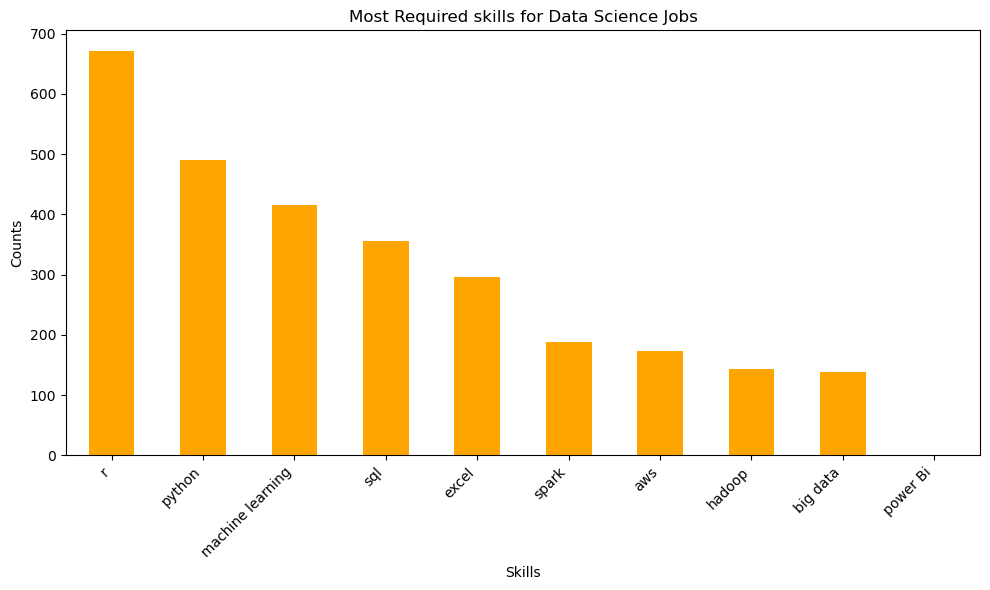

In [17]:
#Plot a bar chart showing the most required skills for data science jobs
#Create a list with the columns intended to the used in the bar chart
skills = ["python", "machine learning", "r", "sql", "aws", "excel", "power Bi", "hadoop", "spark", "big data"]

# Calculate the total counts for each skill column and sort in descending order
total_counts = df[skills].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_counts.plot(kind="bar", color="orange")
plt.xlabel("Skills")
plt.ylabel("Counts")
plt.title("Most Required skills for Data Science Jobs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

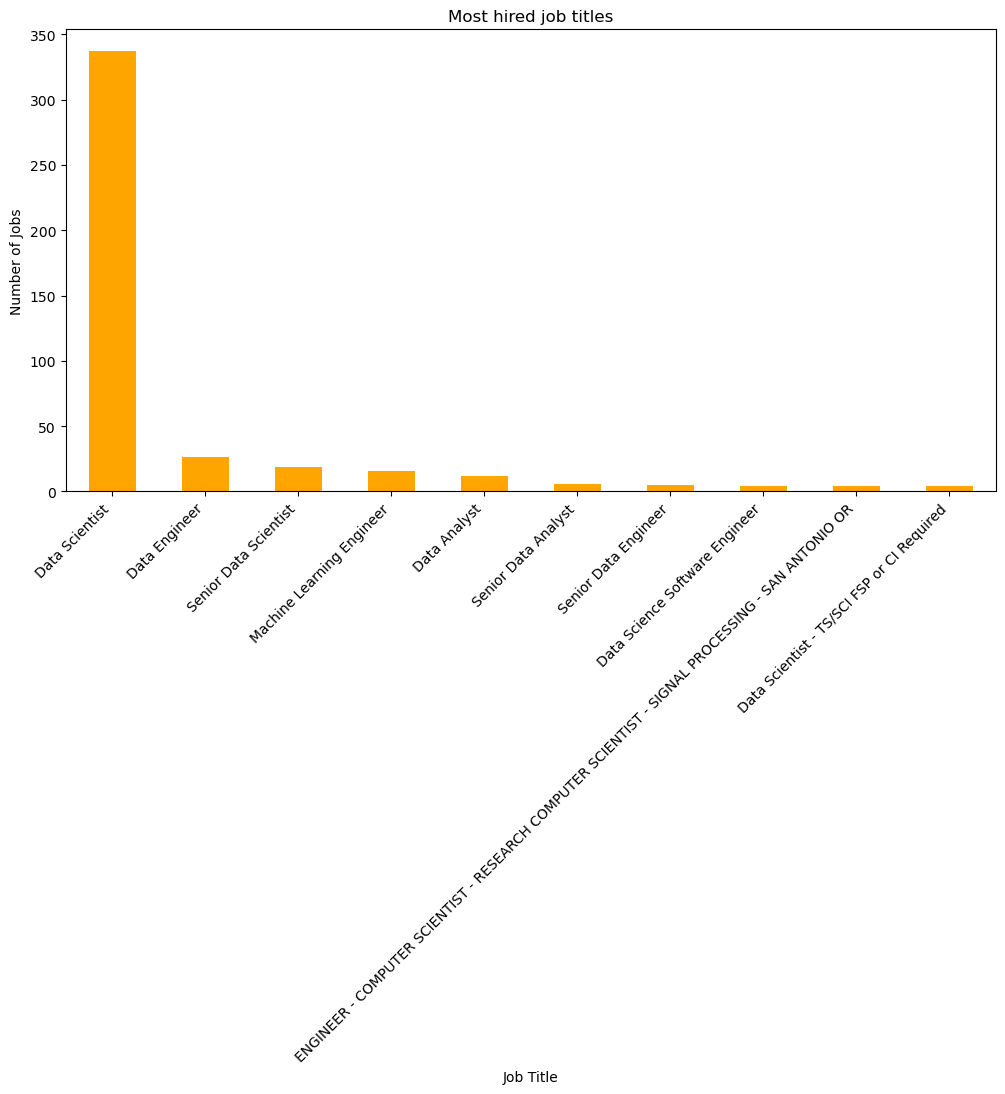

In [18]:
#Plot a bar chart showing the top 10 cities with the highest number of data science jobs.
location_counts = df['Job Title'].value_counts().head(10)  

plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='orange')
plt.title('Most hired job titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
#Extarct skills from job description
qualifications = ["bachelor", "masters","phd"]

def extract_and_categorize_qualifications(text):
    doc = nlp(text.lower())  
    qualification_dict = {qualification: 1 if qualification in doc.text else 0 for qualification in qualifications}
    return qualification_dict

df[qualifications] = df["Job Description"].apply(extract_and_categorize_qualifications).apply(pd.Series)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,power Bi,hadoop,spark,big data,Lower Salary,Upper Salary,Average_Salary,bachelor,masters,phd
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,0,0,0,137,171,154.0,1,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,1,0,1,137,171,154.0,1,0,0
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,0,0,0,0,137,171,154.0,0,0,1
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,0,0,0,0,137,171,154.0,1,0,0
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,0,137,171,154.0,0,0,0


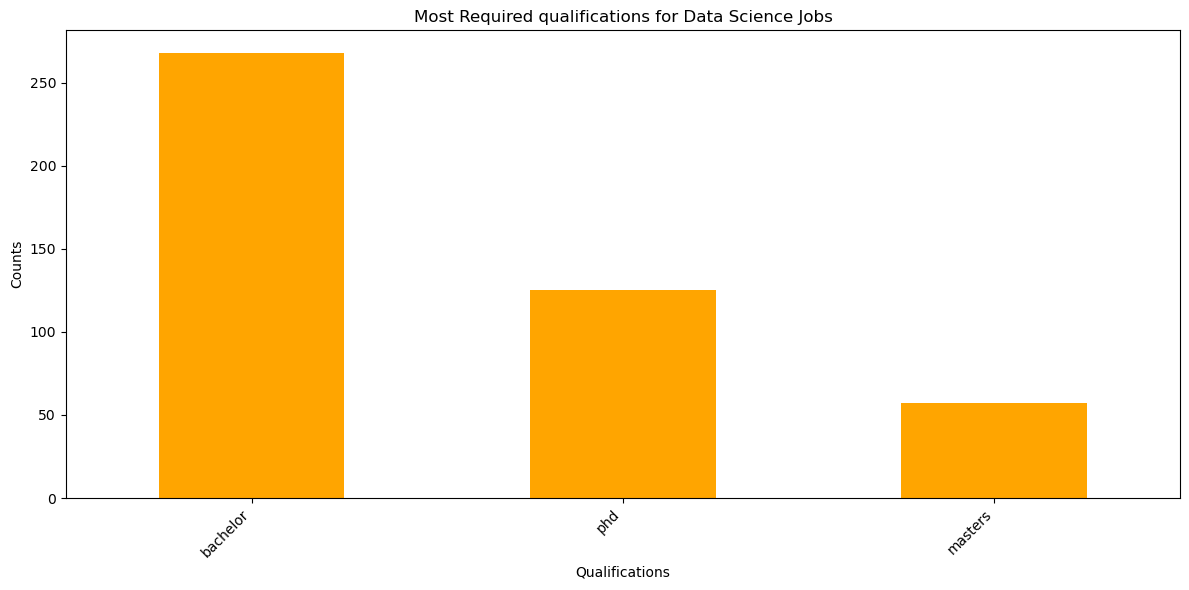

In [28]:
#Plot a bar chart showing the most required qualification for data science jobs
qualifications = ["bachelor", "masters","phd"]

# Calculate the total counts for each skill column and sort in descending order
total_counts = df[qualifications].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
total_counts.plot(kind="bar", color="orange")
plt.xlabel("Qualifications")
plt.ylabel("Counts")
plt.title("Most Required qualifications for Data Science Jobs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

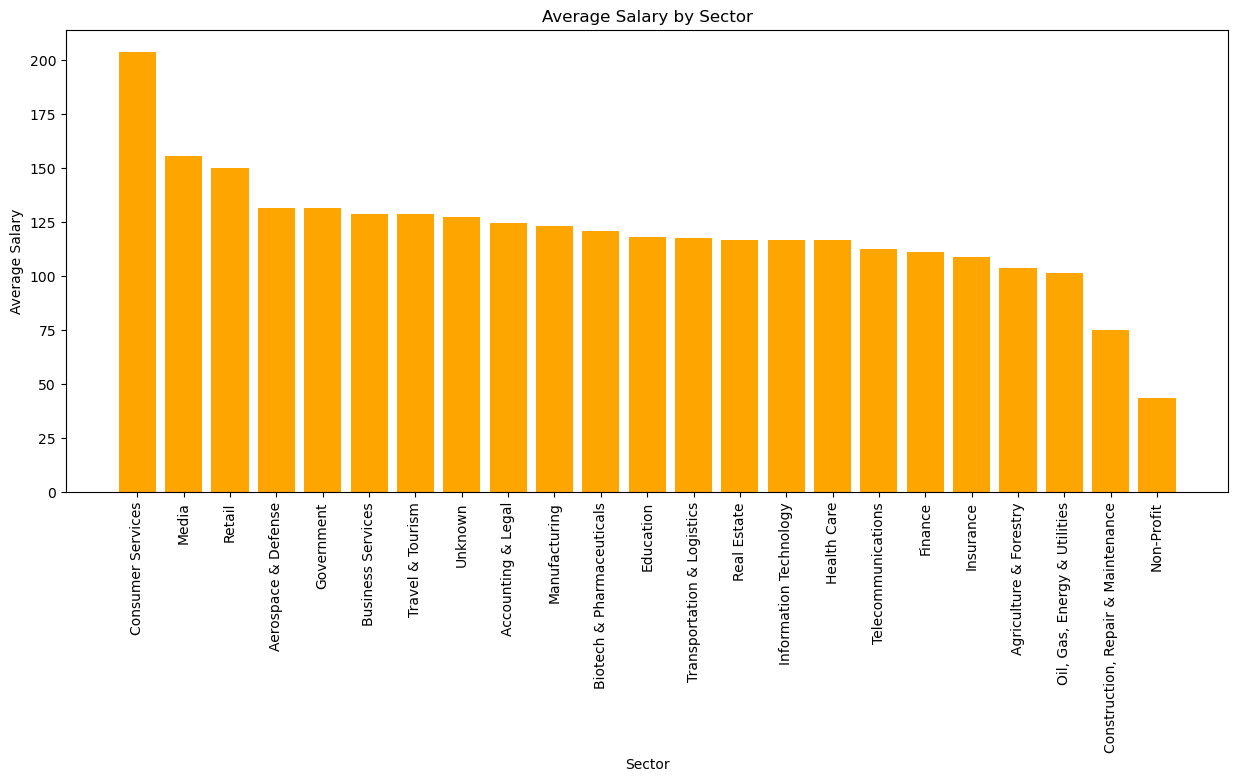

In [24]:
# Plot a barchart showing the average salary by sector
average_salary_by_sector = df.groupby('Sector')['Average_Salary'].mean().reset_index()


average_salary_by_sector = average_salary_by_sector.sort_values(by='Average_Salary', ascending=False)

color = 'orange'

plt.figure(figsize=(15, 6)) 
plt.bar(average_salary_by_sector['Sector'], average_salary_by_sector['Average_Salary'], color = color)
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.title('Average Salary by Sector')

plt.xticks(rotation=90)

plt.show()

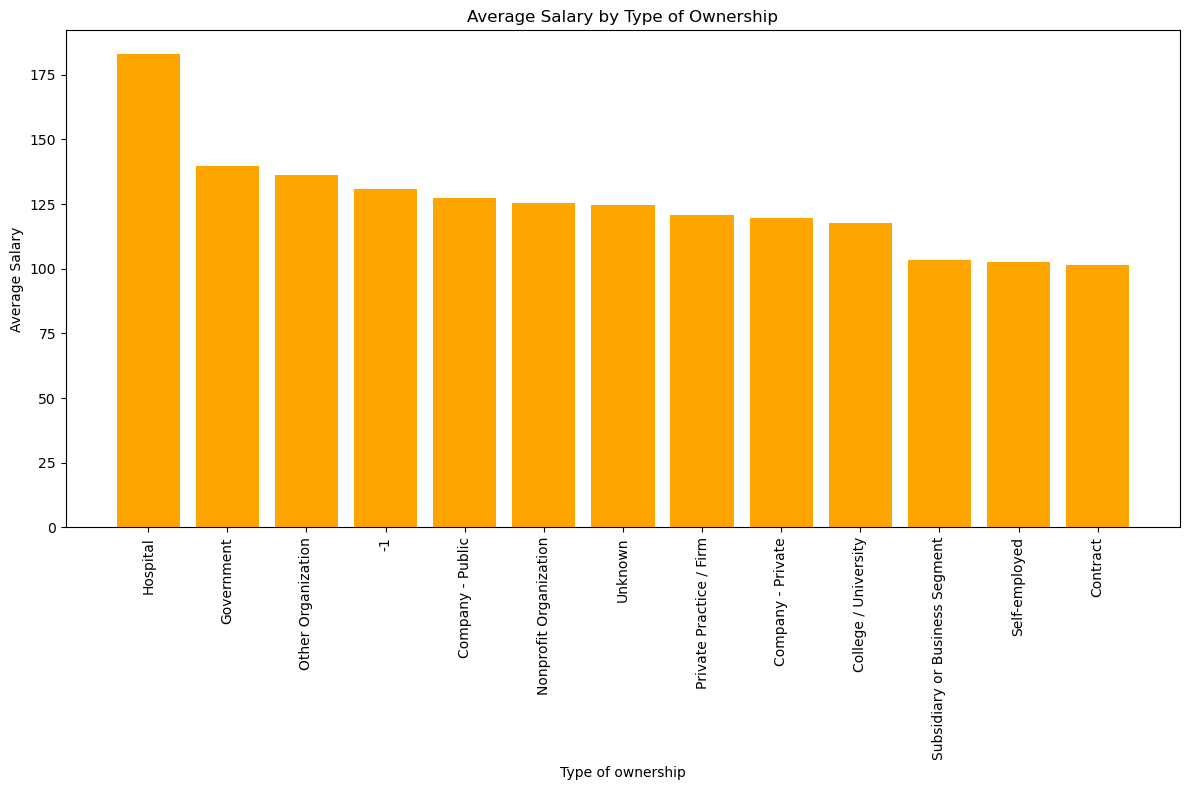

In [25]:
#Plot a bar chart showing the average salary by type of ownership
average_salary_by_ownership = df.groupby('Type of ownership')['Average_Salary'].mean().reset_index()

average_salary_by_ownership = average_salary_by_ownership.sort_values(by='Average_Salary', ascending=False)
color = 'orange'

plt.figure(figsize=(12, 8))
plt.bar(average_salary_by_ownership['Type of ownership'], average_salary_by_ownership['Average_Salary'], color=color)
plt.xlabel('Type of ownership')
plt.ylabel('Average Salary')
plt.title('Average Salary by Type of Ownership')
plt.xticks(rotation=90)  
plt.tight_layout()

plt.show()


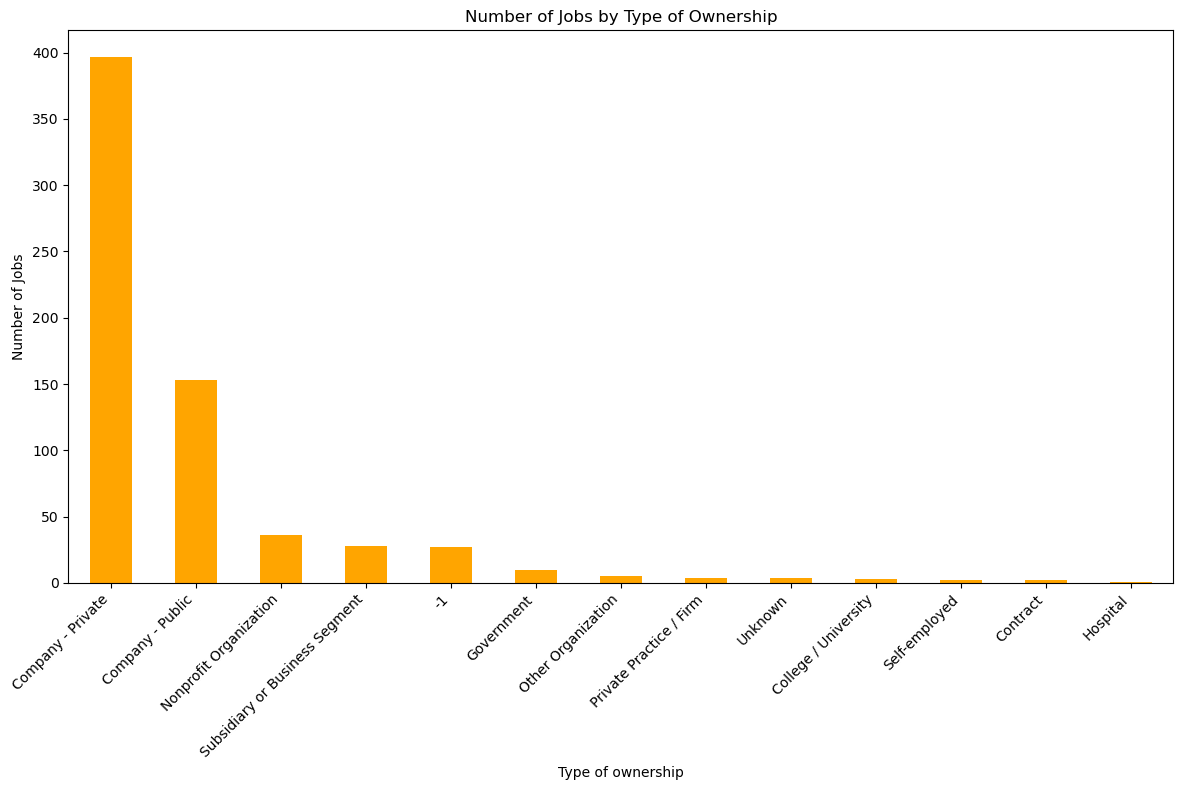

In [26]:
#Plot a bar chart showing the number of jobs by type of ownership.
sector_counts = df['Type of ownership'].value_counts().head(15)  

plt.figure(figsize=(12, 8))
sector_counts.plot(kind='bar', color='orange')
plt.title('Number of Jobs by Type of Ownership')
plt.xlabel('Type of ownership')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
#Export the newly created dataset to csv.
file_path = 'Data.csv'  

df.to_csv(file_path, index=False)